## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

## Reading and loading dataset

In [2]:
df=pd.read_csv('C:/Users/DELL/Downloads/spam_and_ham_classification.csv.zip')
df

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
...,...,...
9984,ham,this would be a great tragedy for all concerne...
9985,ham,"hello , welcome to medzonline filamentous shop..."
9986,ham,this is amazing stuff add some inches fast saf...
9987,spam,author jra date escapenumber escapenumber esca...


In [3]:
df.head(10)

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
5,ham,categories company guidefood beverage your dad...
6,spam,alert name bush officers ex cia chief tenet a ...
7,spam,the vacation carry - over report is due to pay...
8,ham,"lncrease your sprm volume , and orgsm length\n..."
9,ham,respect hobby putting armpit farts portion con...


## Data preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
obj1=LabelEncoder()

In [6]:
df['label']=obj1.fit_transform(df[['label']])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
df

,label,text
0,0,into the kingdom of god and those that are ent...
1,1,there was flow at hpl meter 1505 on april firs...
2,0,take a look at this one campaign for bvyhprice...
3,1,somu wrote actually thats what i was looking f...
4,1,fathi boudra wrote i fixed the issue in the sv...
...,...,...
9984,0,this would be a great tragedy for all concerne...
9985,0,"hello , welcome to medzonline filamentous shop..."
9986,0,this is amazing stuff add some inches fast saf...
9987,1,author jra date escapenumber escapenumber esca...


## Data Visualization

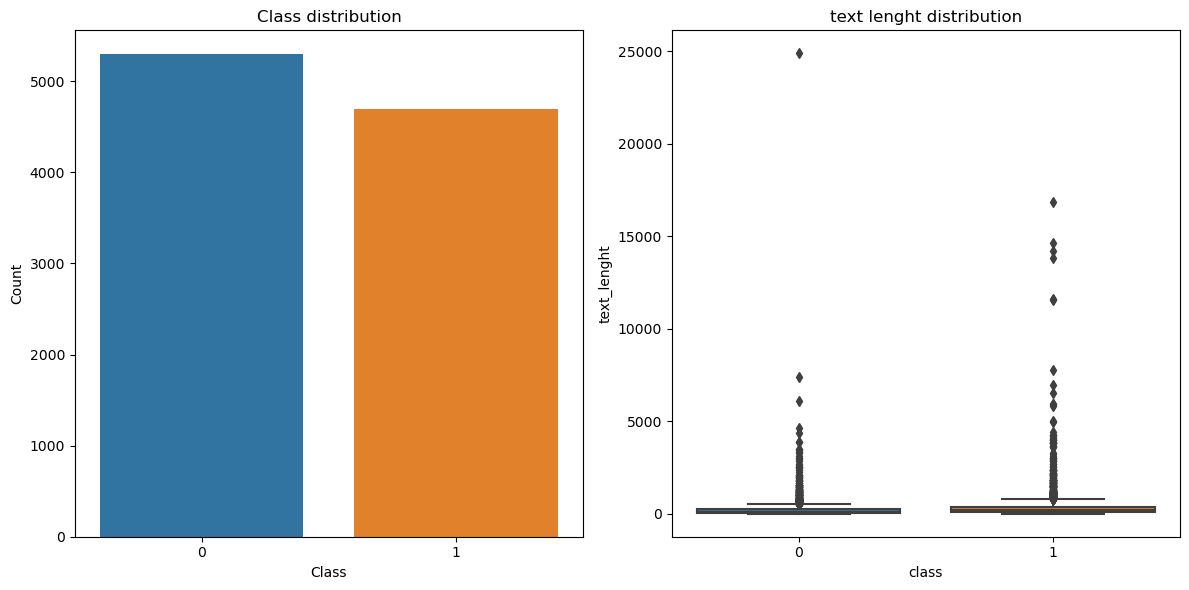

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x='label')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1,2,2)
df['text_lenght']=df['text'].apply(lambda x:len(x.split()))
sns.boxplot(data=df,x='label',y='text_lenght')
plt.title('text lenght distribution')
plt.xlabel('class')
plt.ylabel('text_lenght')
plt.tight_layout()
plt.show()

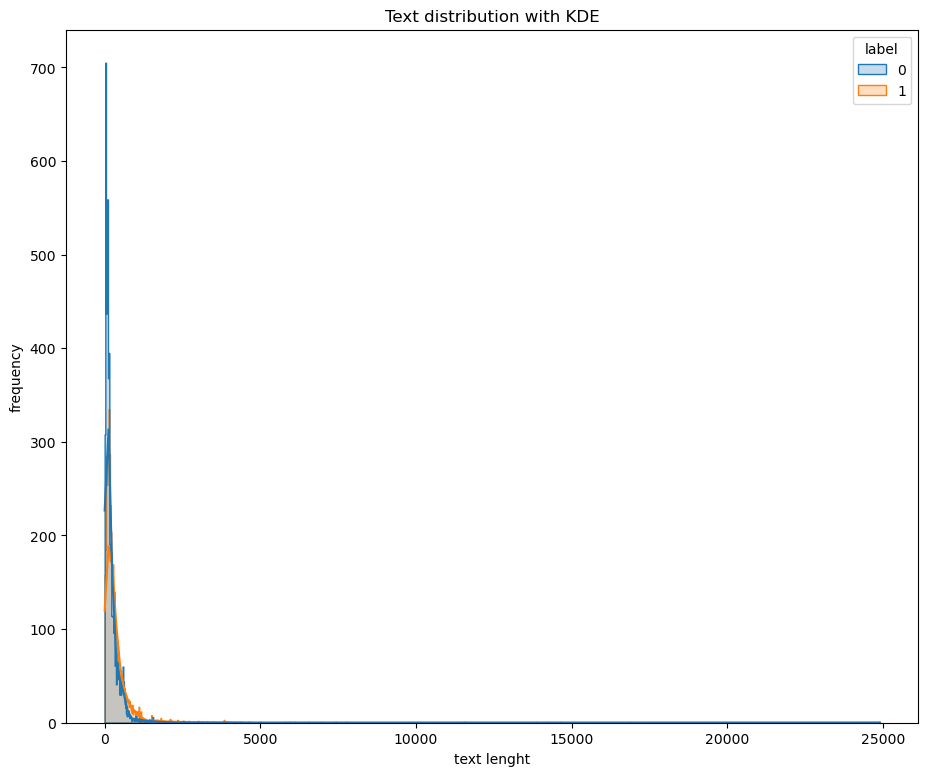

In [9]:
plt.figure(figsize=(11,9))
sns.histplot(data=df,x='text_lenght',hue='label',kde=True,element='step')
plt.title('Text distribution with KDE')
plt.xlabel('text lenght')
plt.ylabel('frequency')
plt.show()

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


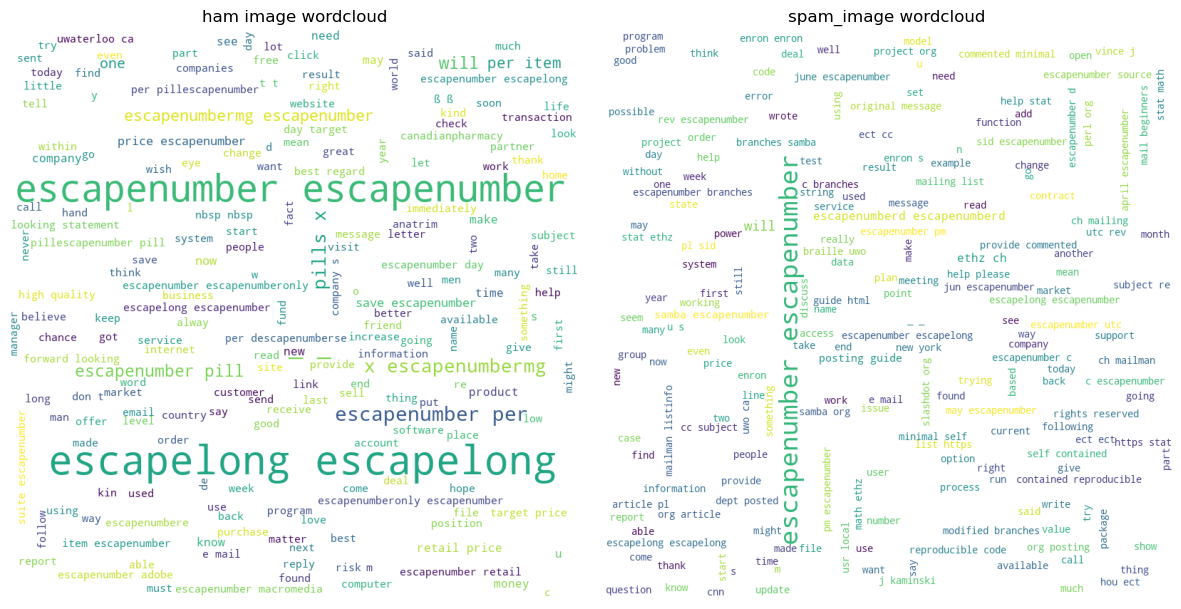

In [11]:
ham_text=" ".join(df[df['label']==0]['text'])
spam_text=" ".join(df[df['label']==1]['text'])

ham_wordcloud=WordCloud(width=800,height=800,background_color='white').generate(ham_text)
spam_wordcloud=WordCloud(width=800,height=800,background_color='white').generate(spam_text)

ham_image=ham_wordcloud.to_array()
spam_image=spam_wordcloud.to_array()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(ham_image)
plt.title('ham image wordcloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(spam_image)
plt.title('spam_image wordcloud')
plt.axis('off')

plt.tight_layout()
plt.show()

## Text Analysis

In [12]:
def preprocess_text(text):
    words = word_tokenize(text) 
    words = [word.lower() for word in words if word.isalnum()] 
    words = [ word for word in words if word not in stopwords.words("english")] 
    return " ".join(words) 


In [13]:
df['text']=df['text'].apply(preprocess_text)

In [14]:
tfidf_vectorizer=TfidfVectorizer()

In [15]:
x=tfidf_vectorizer.fit_transform(df['text']).toarray()
y=df['label']

## Spilting data into train-test split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

## Naive Bayes Algorithm

In [17]:
obj1=MultinomialNB(alpha=0.1)

In [18]:
obj1.fit(x_train,y_train)

MultinomialNB()

In [19]:
y_train

8725    0
3917    0
3589    0
6741    1
794     0
       ..
1293    0
4023    1
7259    1
5200    1
3775    0
Name: label, Length: 7991, dtype: int32

In [20]:
train_predict=obj1.predict(x_train)
train_predict

array([0, 0, 0, ..., 1, 1, 0])

In [21]:
y_test

2416    1
9513    0
1198    0
4199    1
5182    0
       ..
6657    1
4550    1
7366    1
8479    1
5330    0
Name: label, Length: 1998, dtype: int32

In [22]:
test_predict=obj1.predict(x_test)
test_predict

array([1, 0, 0, ..., 1, 1, 0])

##  Preparing Classification Report

In [23]:
from sklearn.metrics import classification_report,accuracy_score

In [24]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4240
           1       0.98      0.99      0.98      3751

    accuracy                           0.99      7991
   macro avg       0.99      0.99      0.99      7991
weighted avg       0.99      0.99      0.99      7991



In [25]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1054
           1       0.95      0.97      0.96       944

    accuracy                           0.96      1998
   macro avg       0.96      0.96      0.96      1998
weighted avg       0.96      0.96      0.96      1998

